# Chapter 4 - Missing Data

In [2]:
# Basic Libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

### Dataset

The following columns are included in the dataset:

    • pclass - Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
    • survival - Survival (0 = No, 1 = Yes)
    • name - Name
    • sex - Sex
    • age - Age
    • sibsp - Number of siblings/spouses aboard
    • parch - Number of parents/children aboard
    • ticket - Ticket number
    • fare - Passenger fare
    • cabin - Cabin
    • embarked - Point of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    • boat - Lifeboat
    • body - Body identification number
    • home.dest - Home/destination

In [5]:
url = ("https://raw.githubusercontent.com/joanby/python-ml-course/refs/heads/master/datasets/titanic/titanic3.csv")
df = pd.read_csv(url)
orig_df = df
orig_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
# Get percent of missing data
df.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

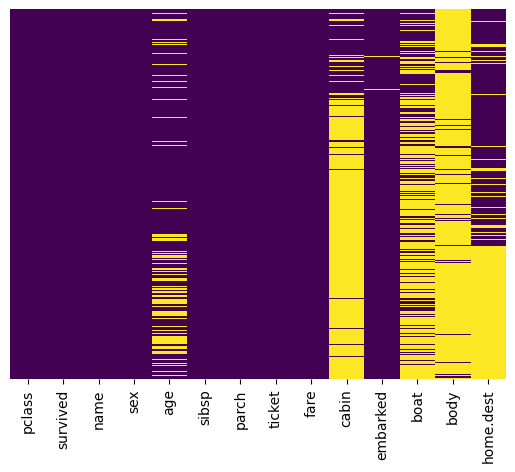

In [8]:
# Heatmap for visualize the missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

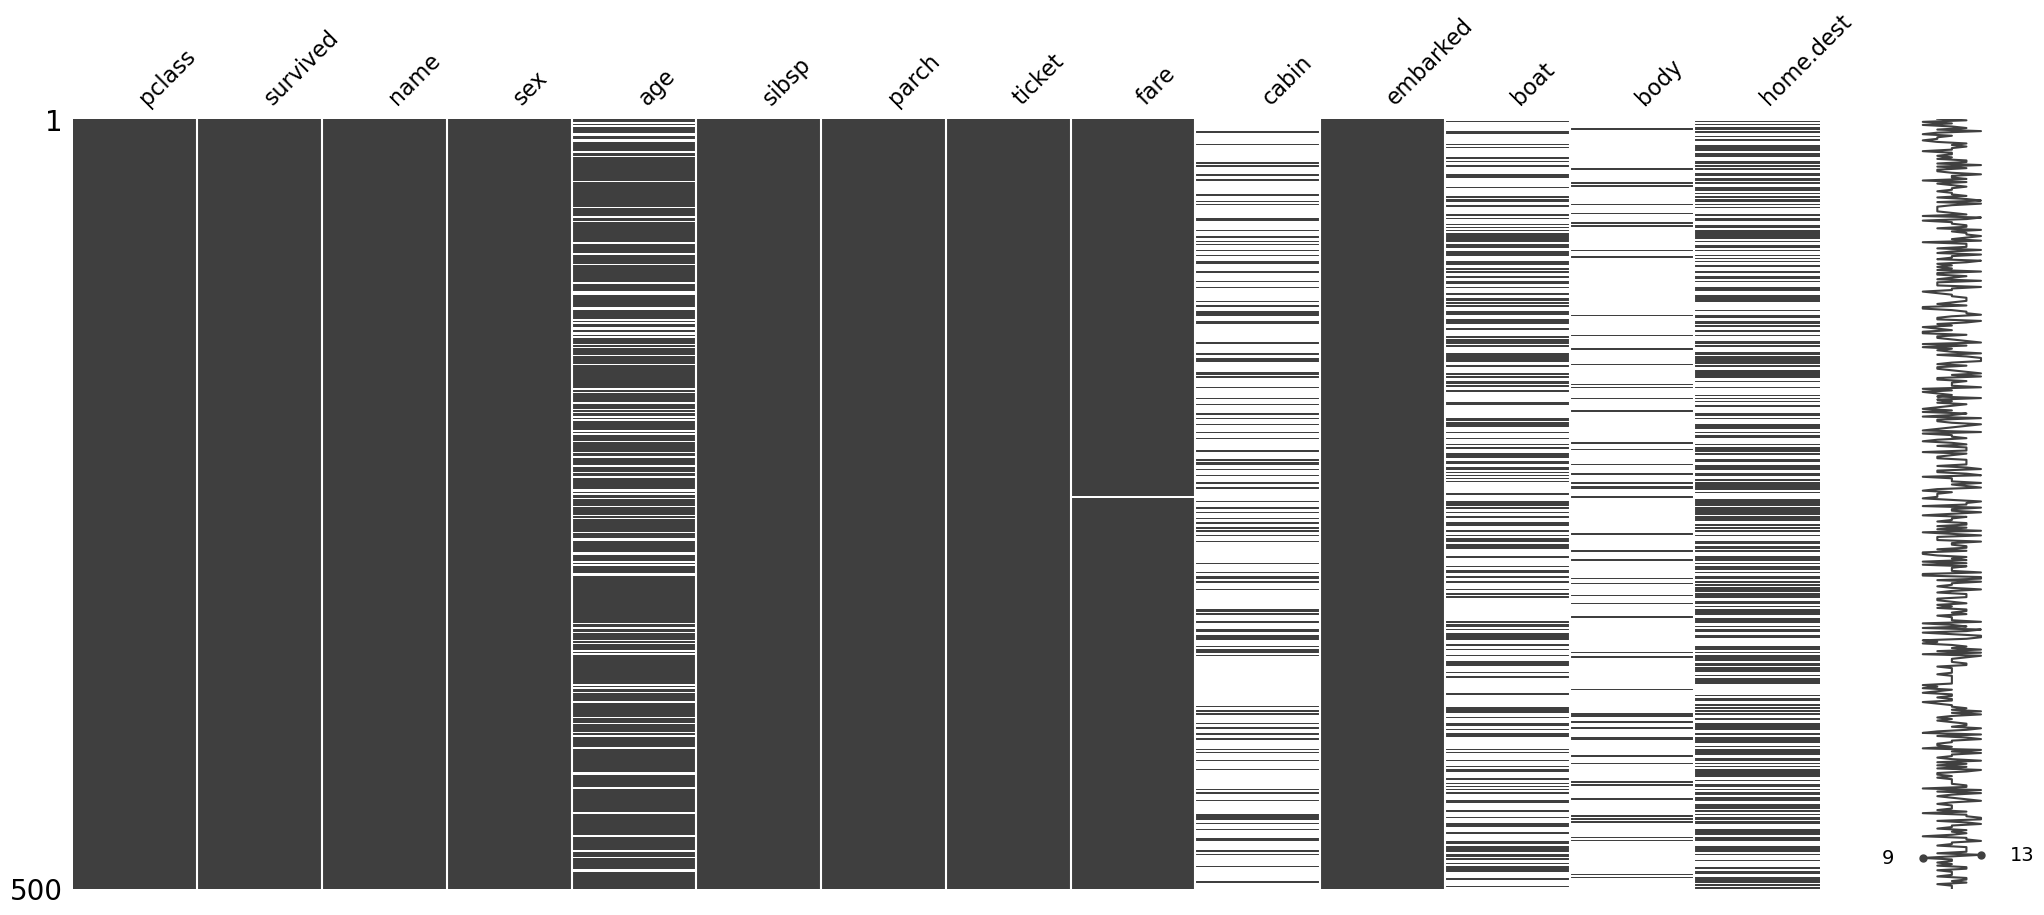

In [9]:
import missingno as msno

ax = msno.matrix(orig_df.sample(500))              # Visualize missing data in a random sample of 500 rows from the original DataFrame

# ax.get_figure().savefig("images/mlpr_0401.png")  # Optional: Save the figure as a PNG file (commented out, can be used if needed)

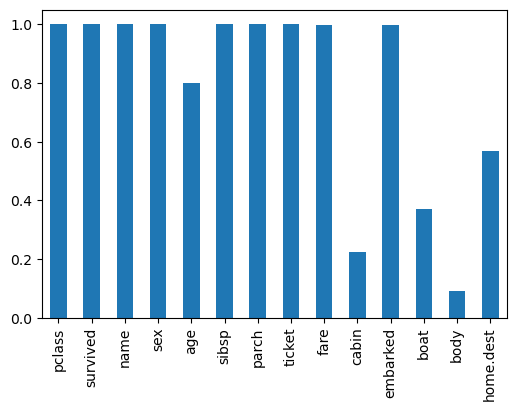

In [10]:
# We can create a bar plot of missing data counts using pandas

fig, ax = plt.subplots(figsize=(6, 4))  # Create a figure and axes with a size of 6x4 inches for the bar plot

# Calculate the proportion of non-missing values for each column, take the absolute value (though it's not necessary here),
# and plot the results as a bar chart
(1 - df.isnull().mean()).abs().plot.bar(ax=ax);  

# Explanation: 
# 1. df.isnull().mean(): Calculates the percentage of missing values for each column in the DataFrame (mean of boolean True/False).
# 2. 1 - df.isnull().mean(): Subtracts the missing value percentage from 1, resulting in the percentage of non-missing values.
# 3. abs(): Since the values are positive, this is redundant but ensures no negative values.
# 4. .plot.bar(ax=ax): Plots the percentages as a bar chart on the provided axes (ax).

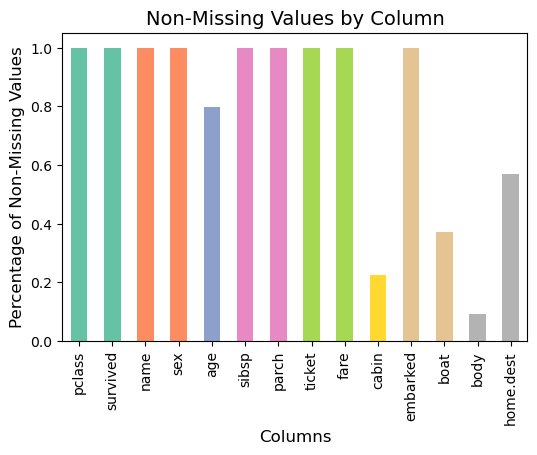

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))  # Create a figure and axes for the plot

# Create a color map to make the bars colorful
colors = plt.cm.Set2(np.linspace(0, 1, df.shape[1]))  # Use the 'Set2' colormap to generate colors

# Calculate the non-missing value percentages and plot the bar chart with colorful bars
(1 - df.isnull().mean()).abs().plot.bar(ax=ax, color=colors)

# Set plot title and labels
ax.set_title('Non-Missing Values by Column', fontsize=14)       # Add a title to the plot
ax.set_ylabel('Percentage of Non-Missing Values', fontsize=12)  # Add y-axis label
ax.set_xlabel('Columns', fontsize=12)                           # Add x-axis label

# Show the plot
plt.show();

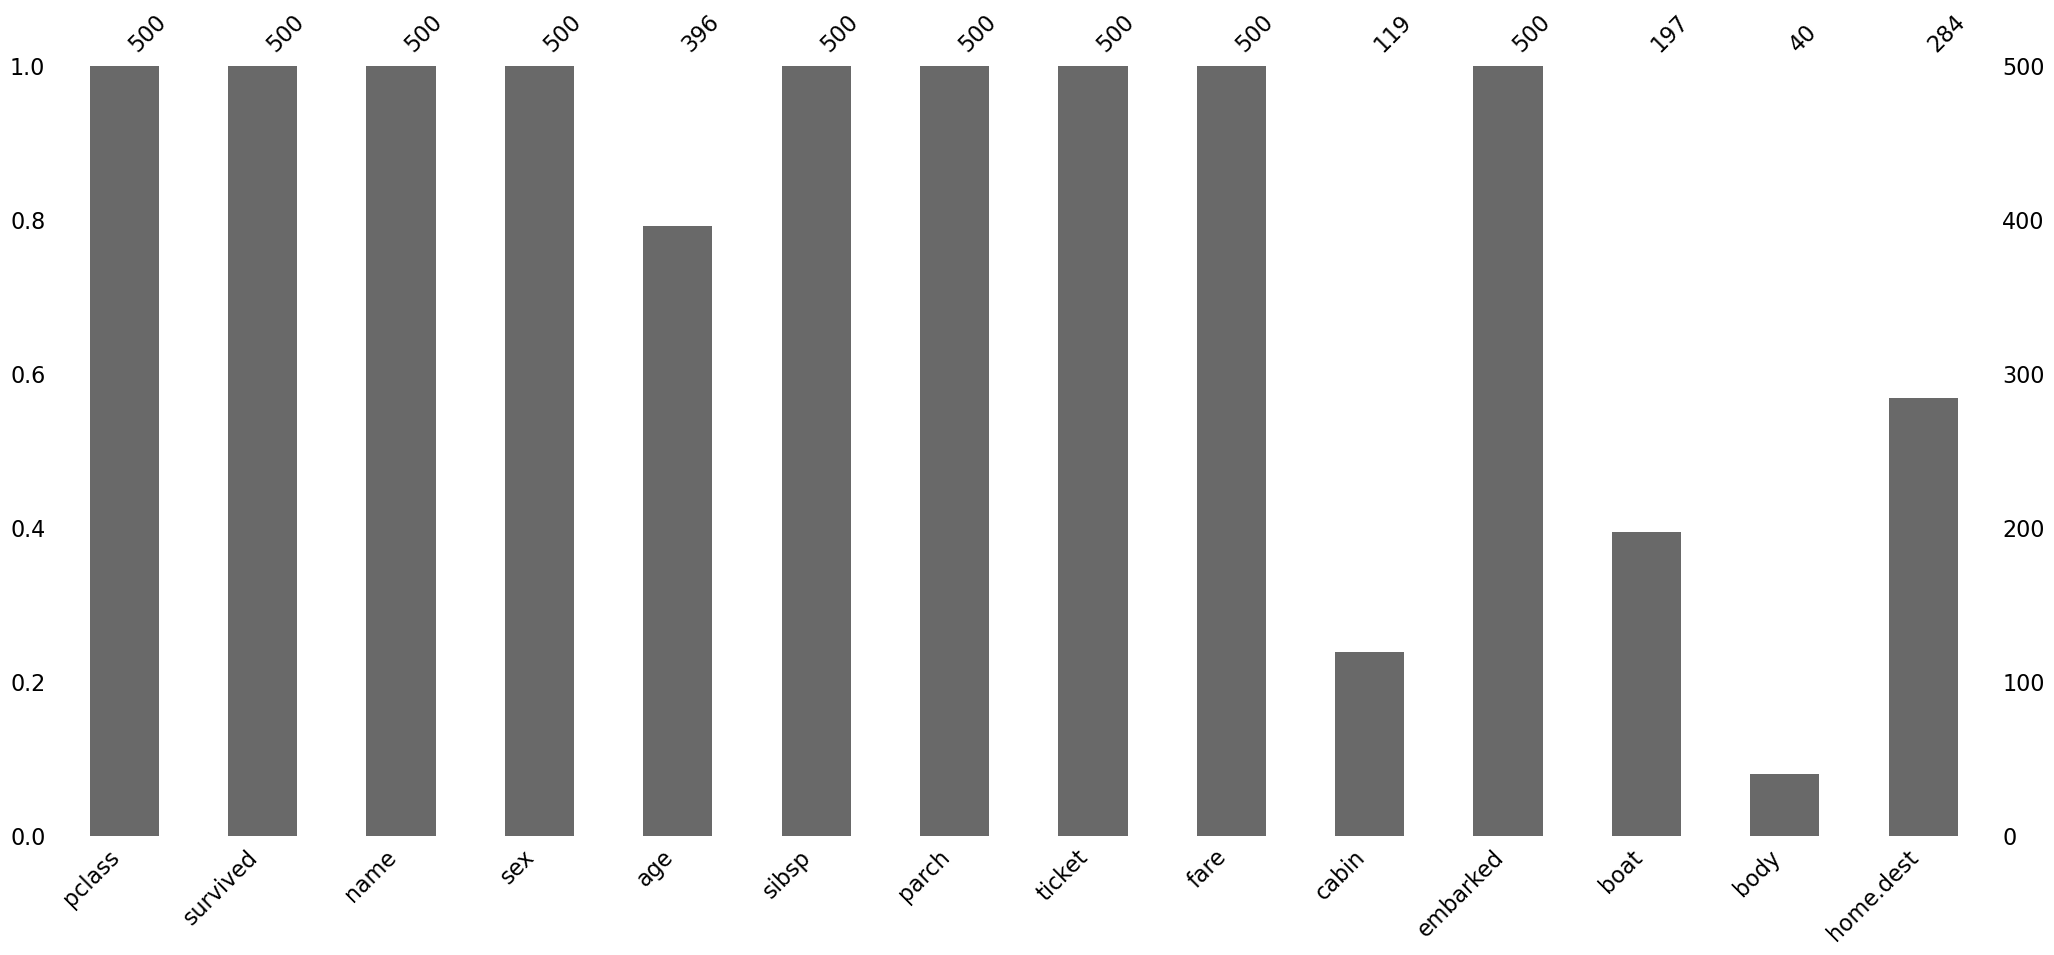

In [12]:
ax = msno.bar(orig_df.sample(500))

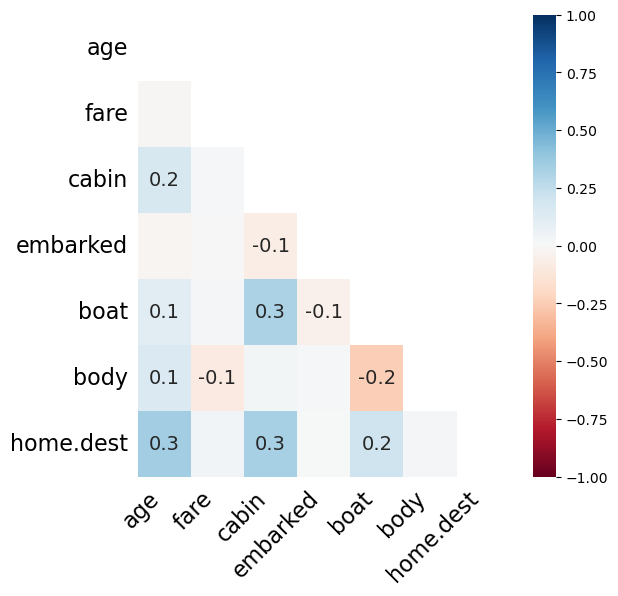

In [13]:
# We can create a heat map showing if there are correlations where data is missing 

ax = msno.heatmap(df, figsize=(6, 6))

We can create a dendrogram showing the clusterings of where data is missing. Leaves that are at the same level predict one another’s presence (empty or filled). The vertical arms are used to indicate how different clusters are. Short arms mean that branches are similar:

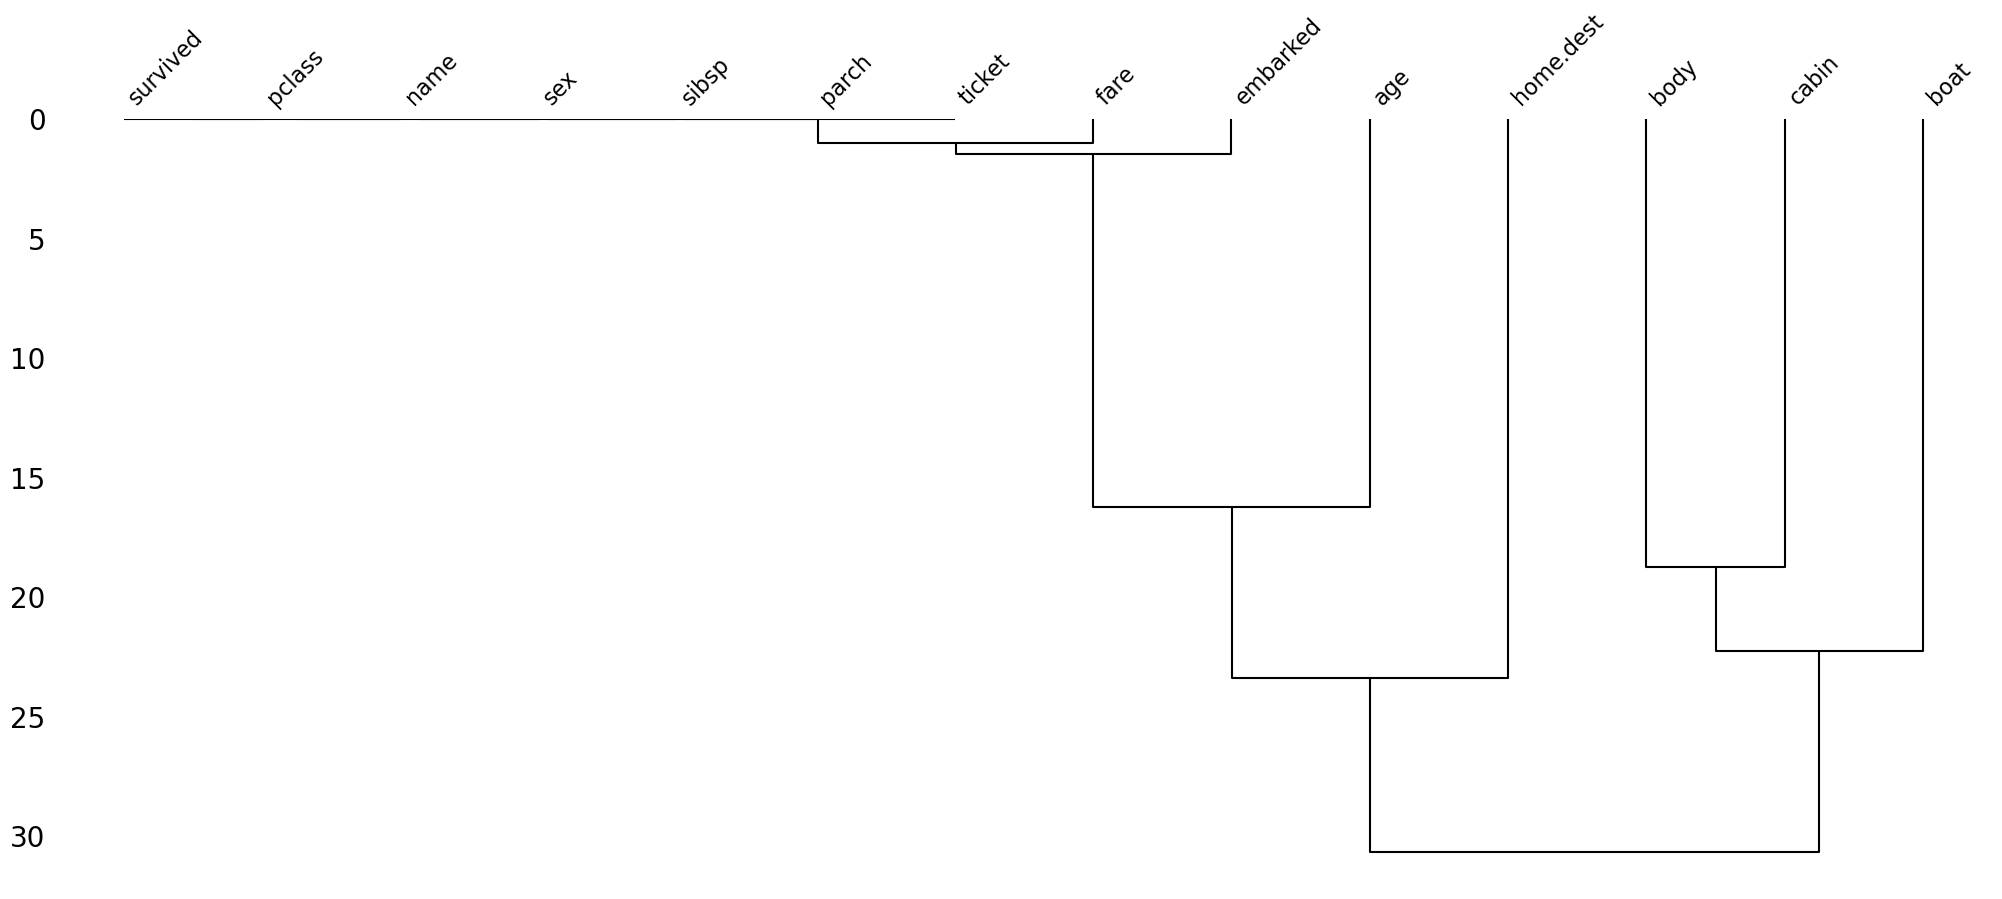

In [15]:
ax = msno.dendrogram(df)

### Dropping Missing Data

In [17]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [18]:
# We can pass in a list of column names or a single column name
df1 = df.drop(columns="cabin")

df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
# Drop if one of the rows has NA
df1 = df.dropna(axis=0)  # Or just: df1 = df.dropna()

df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [20]:
# Drop along the column axis (Drop columns that has NA)
df1 = df.dropna(axis=1)

df1.head()

,pclass,survived,name,sex,sibsp,parch,ticket
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781


### Imputing Data

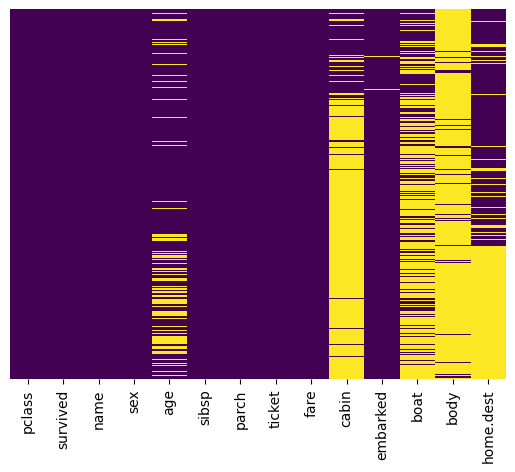

In [22]:
# Heatmap for visualize the missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [23]:
from sklearn.impute import SimpleImputer  

num_cols = df.select_dtypes(  # Select only the numerical columns from the DataFrame (df)
    include="number"          # Filter the columns that have numerical data types (int, float)
).columns                     # Extract the column names of the selected numerical columns

im = SimpleImputer()          # Instantiate a SimpleImputer object with the default strategy ('mean')

imputed = im.fit_transform(df[num_cols])  # Fit the imputer to the numerical columns and transform the data by 
                                          # filling missing values with the column mean

In [24]:
# Assign the imputed data back to the original DataFrame
df[num_cols] = imputed  # Replace the numerical columns in df with the imputed values

# Verify that the missing values have been replaced
df.isnull().sum()  # This will show the count of missing values in each column (should be zero for the imputed columns)

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body            0
home.dest     564
dtype: int64

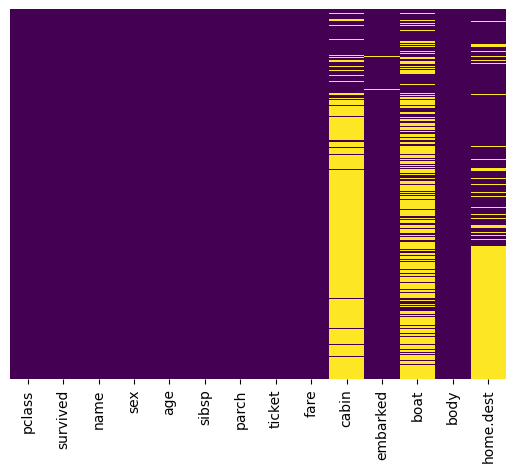

In [25]:
# Heatmap for visualize the missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

### Adding Indicator Columns

The pandas library can add a new column to indicate that a value was missing:

In [28]:
def add_indicator(col):                    # Define a function that takes a column name (col) as input
    def wrapper(df):                       # Define an inner function (wrapper) that takes a DataFrame (df) as input
        return df[col].isna().astype(int)  # Check for NaN values in the specified column, 
                                           # convert the boolean result to integers (1 for NaN, 0 for non-NaN)

    return wrapper                         # Return the inner wrapper function

In [29]:
df1 = df.assign(                              # Create a new DataFrame (df1) by assigning a new column to the original DataFrame (df)
    cabin_missing=add_indicator("cabin")(df)  # Add a new column 'cabin_missing' to indicate missing values in the 'cabin' column
)

df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_missing
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO",0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON",0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON",0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",0
